## Empirical Distribution and Inverse Transform Theorem

In [1]:
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
from statsmodels.distributions.empirical_distribution import ECDF

In [3]:
normals = sp.random.normal(0,1,10000)
normals_right = sp.random.normal(4,0.5,2000)

In [4]:
bin_val = 20 # use 10 for better results in the empirical bootstrap

In [5]:
empirical = np.append(normals, normals_right)

Text(0.5, 1.0, 'Density')

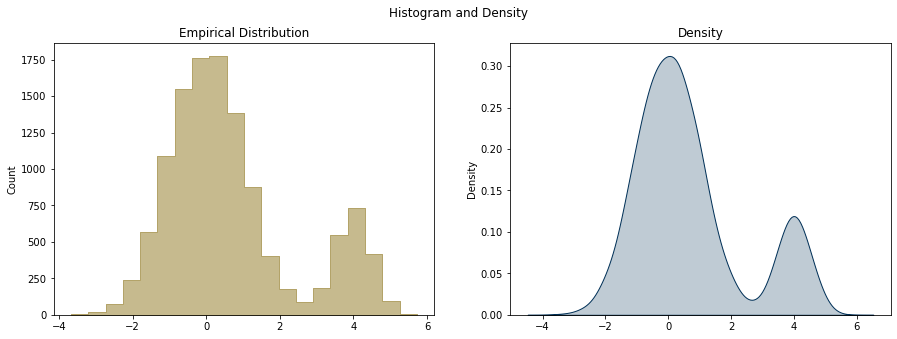

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histogram and Density')

sns.histplot(ax=axes[0], x=empirical, bins=20, color='#B3A369', element='step')
axes[0].set_title('Empirical Distribution')

sns.kdeplot(ax=axes[1], x=empirical, color='#003057', fill='#003057')
axes[1].set_title('Density')

In [7]:
values, bins = np.histogram(empirical, bins=bin_val)

In [8]:
values

array([   8,   22,   73,  239,  565, 1092, 1551, 1762, 1775, 1387,  876,
        405,  175,   86,  181,  550,  729,  418,   98,    8], dtype=int64)

In [9]:
bins

array([-3.67330569, -3.20347589, -2.73364609, -2.26381629, -1.7939865 ,
       -1.3241567 , -0.8543269 , -0.3844971 ,  0.08533269,  0.55516249,
        1.02499229,  1.49482208,  1.96465188,  2.43448168,  2.90431148,
        3.37414127,  3.84397107,  4.31380087,  4.78363066,  5.25346046,
        5.72329026])

In [10]:
len([el for el in empirical if (el >=-3.31) and (el <=-2.86)])

10

In [11]:
pdf = np.round(values / np.sum(values), 3)
pdf

array([0.001, 0.002, 0.006, 0.02 , 0.047, 0.091, 0.129, 0.147, 0.148,
       0.116, 0.073, 0.034, 0.015, 0.007, 0.015, 0.046, 0.061, 0.035,
       0.008, 0.001])

In [12]:
len(bins), len(pdf), pdf[8]

(21, 20, 0.148)

In [13]:
[(i,el) for i,el in enumerate(values / np.sum(values))]

[(0, 0.0006666666666666666),
 (1, 0.0018333333333333333),
 (2, 0.006083333333333333),
 (3, 0.019916666666666666),
 (4, 0.04708333333333333),
 (5, 0.091),
 (6, 0.12925),
 (7, 0.14683333333333334),
 (8, 0.14791666666666667),
 (9, 0.11558333333333333),
 (10, 0.073),
 (11, 0.03375),
 (12, 0.014583333333333334),
 (13, 0.007166666666666667),
 (14, 0.015083333333333334),
 (15, 0.04583333333333333),
 (16, 0.06075),
 (17, 0.034833333333333334),
 (18, 0.008166666666666666),
 (19, 0.0006666666666666666)]

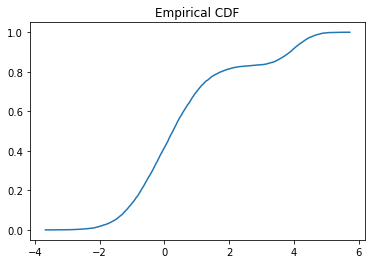

In [14]:
ecdf = ECDF(empirical)
plt.plot(ecdf.x, ecdf.y)
plt.title('Empirical CDF')
plt.show()

Text(0.5, 1.0, 'Inverse Transfrom Theorem - Empirical Distribution')

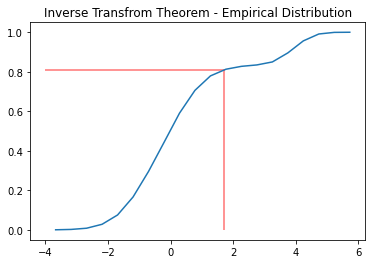

In [15]:
plt.plot(np.linspace(np.min(empirical),np.max(empirical),bin_val),np.cumsum(values/np.sum(values)))
plt.hlines(0.81, xmin=-4, xmax=1.75, color='#FF7373')
plt.vlines(1.72, ymin=0, ymax=0.81, color='#FF7373')
plt.title('Inverse Transfrom Theorem - Empirical Distribution')

In [16]:
np.cumsum(values/np.sum(values))

array([6.66666667e-04, 2.50000000e-03, 8.58333333e-03, 2.85000000e-02,
       7.55833333e-02, 1.66583333e-01, 2.95833333e-01, 4.42666667e-01,
       5.90583333e-01, 7.06166667e-01, 7.79166667e-01, 8.12916667e-01,
       8.27500000e-01, 8.34666667e-01, 8.49750000e-01, 8.95583333e-01,
       9.56333333e-01, 9.91166667e-01, 9.99333333e-01, 1.00000000e+00])

In [17]:
bins

array([-3.67330569, -3.20347589, -2.73364609, -2.26381629, -1.7939865 ,
       -1.3241567 , -0.8543269 , -0.3844971 ,  0.08533269,  0.55516249,
        1.02499229,  1.49482208,  1.96465188,  2.43448168,  2.90431148,
        3.37414127,  3.84397107,  4.31380087,  4.78363066,  5.25346046,
        5.72329026])

In [18]:
values

array([   8,   22,   73,  239,  565, 1092, 1551, 1762, 1775, 1387,  876,
        405,  175,   86,  181,  550,  729,  418,   98,    8], dtype=int64)

In [19]:
mycdf = np.cumsum(values/np.sum(values))

In [20]:
mycdf

array([6.66666667e-04, 2.50000000e-03, 8.58333333e-03, 2.85000000e-02,
       7.55833333e-02, 1.66583333e-01, 2.95833333e-01, 4.42666667e-01,
       5.90583333e-01, 7.06166667e-01, 7.79166667e-01, 8.12916667e-01,
       8.27500000e-01, 8.34666667e-01, 8.49750000e-01, 8.95583333e-01,
       9.56333333e-01, 9.91166667e-01, 9.99333333e-01, 1.00000000e+00])

In [21]:
mycdf>=0.5, np.argmin(mycdf <= 0.5)

(array([False, False, False, False, False, False, False, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True]),
 8)

In [22]:
np.sum(ecdf.y <= 0.8)

9601

In [23]:
ecdf.x[9601]

1.7479108965023906

In [24]:
np.sum(mycdf < 0.4)

7

In [25]:
(np.linspace(np.min(empirical),np.max(empirical),bin_val)[7] + np.linspace(np.min(empirical),np.max(empirical),bin_val)[8]) / 2

0.03587692420511912

In [26]:
values/np.sum(values)

array([0.00066667, 0.00183333, 0.00608333, 0.01991667, 0.04708333,
       0.091     , 0.12925   , 0.14683333, 0.14791667, 0.11558333,
       0.073     , 0.03375   , 0.01458333, 0.00716667, 0.01508333,
       0.04583333, 0.06075   , 0.03483333, 0.00816667, 0.00066667])

In [27]:
pdf = np.zeros_like(bins)
for step in np.arange(5000):
    u = np.random.uniform()
    p = np.argmin(mycdf <= u) # p is the index
    # Increment the counter at bin position of index
    pdf[p]+=1

pdf = pdf / np.sum(pdf)

In [28]:
len(pdf)

21

Text(0.5, 1.0, 'Empirical PDF')

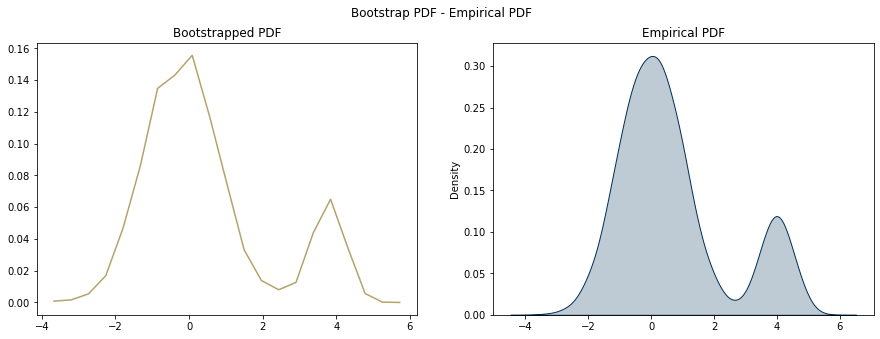

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Bootstrap PDF - Empirical PDF')

# axes[0] = plt.plot(bins, pdf)
# plt.title('PDF from Bootstrapping')

sns.lineplot(ax=axes[0],x=np.linspace(min(bins), max(bins), bin_val+1),  y=pdf, color='#B3A369')
axes[0].set_title('Bootstrapped PDF')

sns.kdeplot(ax=axes[1], x=empirical, color='#003057', fill='#003057')
axes[1].set_title('Empirical PDF')

In [30]:
pdf

array([0.0008, 0.0016, 0.0054, 0.0168, 0.0468, 0.086 , 0.1348, 0.1432,
       0.1556, 0.1174, 0.075 , 0.0332, 0.0138, 0.008 , 0.0126, 0.0438,
       0.065 , 0.0344, 0.0056, 0.0002, 0.    ])

## Aside: Calculating the Bins + Values manually

In [31]:
bin_val = 10

In [32]:
min(empirical), max(empirical)

(-3.6733056851629105, 5.723290258569431)

In [33]:
range_delta = (np.abs(min(empirical)) +np.abs(max(empirical)) ) / bin_val

Note, the change in bin_val, will have an impact on the pdf.

e.g. using 10 will lead to what is seen in the kde density plot, with values around x=0 -> 30%, while this changes when split into 20 bins having x=0 -> 12% (because we see bins -0.3 and +0.3 also with around 10% -> sum = 30% again).

In [34]:
bound = [min(empirical) + i*range_delta for i in np.arange(bin_val)]
bound = np.append(bound, np.max(bound)+range_delta)
for i in np.arange(len(bound)-1):
    print(np.round(bound[i],3),np.round(bound[i+1],3), ':', np.sum(np.unique([el for el in empirical if (el < bound[i+1] and el >= bound[i])], return_counts=True)[1]), np.round(np.sum(np.unique([el for el in empirical if (el < bound[i+1] and el >= bound[i])], return_counts=True)[1]) / len(empirical),3))

-3.673 -2.734 : 30 0.002
-2.734 -1.794 : 312 0.026
-1.794 -0.854 : 1657 0.138
-0.854 0.085 : 3313 0.276
0.085 1.025 : 3162 0.264
1.025 1.965 : 1281 0.107
1.965 2.904 : 261 0.022
2.904 3.844 : 731 0.061
3.844 4.784 : 1147 0.096
4.784 5.723 : 105 0.009


In [35]:
len(empirical)

12000

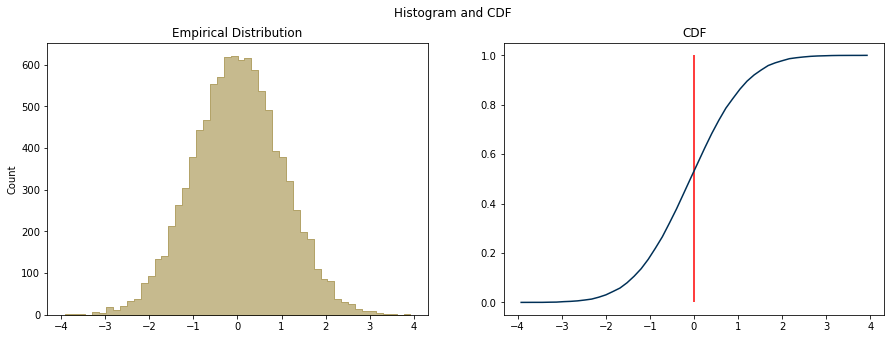

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Histogram and CDF')
np.random.seed(42)

norms = np.random.normal(0,1,10000)
v,b = np.histogram(norms, bins=50)

sns.histplot(ax=axes[0], x=norms, bins=50, color='#B3A369', element='step')
axes[0].set_title('Empirical Distribution')

sns.lineplot(ax=axes[1],x=np.linspace(min(norms), max(norms), 50), y=np.cumsum(v/np.sum(v)), color='#003057')
axes[1].set_title('CDF')
plt.vlines(0, ymin=0, ymax=1, color='red')

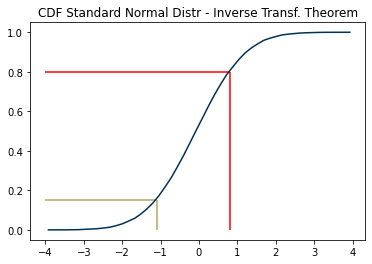

In [37]:
sns.lineplot(x=np.linspace(min(norms), max(norms), 50), y=np.cumsum(v/np.sum(v)), color='#003057')
plt.hlines(0.8, xmin=-4, xmax=.8, color='red')
plt.vlines(.8, ymin=0, ymax=0.8, color='red')
plt.title('CDF Standard Normal Distr - Inverse Transf. Theorem')

plt.hlines(0.15, xmin=-4, xmax=-1.1, color='#B3A369')
plt.vlines(-1.1, ymin=0, ymax=0.15, color='#B3A369')

In [38]:
from scipy.stats import norm

In [39]:
norm.ppf(0.8), norm.ppf(.15)

(0.8416212335729143, -1.0364333894937898)

In [40]:
norm.cdf(0.8), norm.cdf(-1)

(0.7881446014166034, 0.15865525393145707)